In [1]:
## Environment Setup

In [2]:
#!pip install folium

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert (0, './_functions_/')
from functions_eda import *

# Business Objectives

Main question: How prepared is Germany for the upcoming EU ban of diesel and petrol cars?

## Datasets

### Number of charging stations in Germany
https://www.kaggle.com/datasets/mexwell/electric-vehicle-charging-in-germany
#### Number of electrical cars in Germany
 - to be used to create ratio of charging station : number of cars
### Zip Code x State
- mainly used to add the state information to the main dataset

In [4]:
df = pd.read_csv('./charging_data.csv')
df

,Unnamed: 0,betreiber,art_der_ladeeinrichung,anzahl_ladepunkte,anschlussleistung,steckertypen1,steckertypen2,steckertypen3,steckertypen4,p1_kw,...,p4_kw,kreis_kreisfreie_stadt,ort,postleitzahl,strasse,hausnummer,adresszusatz,inbetriebnahmedatum,breitengrad,laengengrad
0,0,GGEW AG,Normalladeeinrichtung,1,4.6,AC Steckdose Typ 2,NaN,NaN,NaN,4.6,...,NaN,Landkreis Bergstraße,Lorsch,64653,Klosterstr.,23,NaN,2017-01-02,49.653064,8.572109
1,1,Pfalzwerke AG,Schnellladeeinrichtung,2,75.0,AC Steckdose Typ 2,DC Kupplung Combo,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Lorsch,64653,Nibelungenstraße,135-137,NaN,2021-04-27,49.652969,8.554764
2,2,ENTEGA Energie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Krumbacher Str.,39,NaN,2017-11-21,49.658037,8.787881
3,3,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Erbacher Str.,102,a,2022-04-08,49.663670,8.796830
4,4,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Schulstr.,12,NaN,2022-04-08,49.646360,8.781410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,36765,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,108,NaN,2016-06-01,51.301227,12.384566
36766,36766,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Scheffelstraße,35,NaN,2016-06-01,51.311695,12.372912
36767,36767,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,55,NaN,2018-07-05,51.305046,12.382487
36768,36768,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Richard Lehmann Straße,120,NaN,2019-08-12,51.314325,12.397213


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36770 entries, 0 to 36769
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              36770 non-null  int64  
 1   betreiber               36770 non-null  object 
 2   art_der_ladeeinrichung  36770 non-null  object 
 3   anzahl_ladepunkte       36770 non-null  int64  
 4   anschlussleistung       36770 non-null  float64
 5   steckertypen1           36770 non-null  object 
 6   steckertypen2           31111 non-null  object 
 7   steckertypen3           2233 non-null   object 
 8   steckertypen4           1132 non-null   object 
 9   p1_kw                   36770 non-null  float64
 10  p2_kw                   31129 non-null  float64
 11  p3_kw                   2233 non-null   float64
 12  p4_kw                   1131 non-null   float64
 13  kreis_kreisfreie_stadt  36770 non-null  object 
 14  ort                     36770 non-null

In [6]:
percentage_null_values(df)

,Percentage_NaN
p4_kw,96.9
steckertypen4,96.9
steckertypen3,93.9
p3_kw,93.9
adresszusatz,87.4
steckertypen2,15.4
p2_kw,15.3
anschlussleistung,0.0
steckertypen1,0.0
art_der_ladeeinrichung,0.0


In [7]:
df.columns

Index(['Unnamed: 0', 'betreiber', 'art_der_ladeeinrichung',
       'anzahl_ladepunkte', 'anschlussleistung', 'steckertypen1',
       'steckertypen2', 'steckertypen3', 'steckertypen4', 'p1_kw', 'p2_kw',
       'p3_kw', 'p4_kw', 'kreis_kreisfreie_stadt', 'ort', 'postleitzahl',
       'strasse', 'hausnummer', 'adresszusatz', 'inbetriebnahmedatum',
       'breitengrad', 'laengengrad'],
      dtype='object')

In [8]:
#remove unnecessary columns. We will not need the streat address for the analysis. The coordinates will be kept, in case we want to plot some map
df = df.drop(columns = ['Unnamed: 0', 'strasse', 'hausnummer', 'adresszusatz', 'p1_kw', 'p2_kw', 'p3_kw', 'p4_kw', 'breitengrad', "laengengrad"] )


In [9]:
# Rename columns
df = df.rename(columns={
    'betreiber': 'operator',
    'art_der_ladeeinrichung': 'charging_facility_type',
    'anzahl_ladepunkte': 'number_of_charging_points',
    'anschlussleistung': 'power_connection_capacity',
    'steckertypen1': 'plug_type_1',
    'steckertypen2': 'plug_type_2',
    'steckertypen3': 'plug_type_3',
    'steckertypen4': 'plug_type_4',
    'kreis_kreisfreie_stadt': 'district_city',
    'ort': 'city',
    'postleitzahl': 'postal_code',
    'inbetriebnahmedatum': 'commissioning_date',   
})

Convert string to datetime

In [10]:
# Convert inbetriebnahmedatum to datetime
df["commissioning_date"] = pd.to_datetime(df["commissioning_date"], errors="coerce")


In [11]:
# Extract month and year from commission_date

In [12]:
# Extract year and month
df["year"] = df["commissioning_date"].dt.year
df["month"] = df["commissioning_date"].dt.month

### Read the second dataset

In [13]:
plz_to_bundesland = pd.read_csv('german-postcodes.csv', sep = ';')

plz_to_bundesland.columns
               

Index(['Ort', 'Plz', 'Bundesland'], dtype='object')

In [14]:
plz_to_bundesland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19675 entries, 0 to 19674
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ort         19671 non-null  object 
 1   Plz         19671 non-null  float64
 2   Bundesland  19671 non-null  object 
dtypes: float64(1), object(2)
memory usage: 461.3+ KB


In [15]:
plz_to_bundesland["Plz"] = plz_to_bundesland["Plz"].astype("Int64") 

In [16]:
plz_to_bundesland["Plz"].value_counts()

Plz
14913    75
23936    66
16928    66
19348    62
14715    56
         ..
90513     1
9517      1
37449     1
85604     1
89447     1
Name: count, Length: 8256, dtype: Int64

In [17]:
plz_to_bundesland.drop_duplicates(subset=['Plz'], inplace = True)

#### Add Column Bundesland to the dataset

In [18]:
df = df.merge(plz_to_bundesland, left_on="postal_code", right_on="Plz", how = "left")
df = df.drop(columns=['Plz', 'Ort'])
df

,operator,charging_facility_type,number_of_charging_points,power_connection_capacity,plug_type_1,plug_type_2,plug_type_3,plug_type_4,district_city,city,postal_code,commissioning_date,year,month,Bundesland
0,GGEW AG,Normalladeeinrichtung,1,4.6,AC Steckdose Typ 2,NaN,NaN,NaN,Landkreis Bergstraße,Lorsch,64653,2017-01-02,2017,1,Hessen
1,Pfalzwerke AG,Schnellladeeinrichtung,2,75.0,AC Steckdose Typ 2,DC Kupplung Combo,NaN,NaN,Landkreis Bergstraße,Lorsch,64653,2021-04-27,2021,4,Hessen
2,ENTEGA Energie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Landkreis Bergstraße,Fürth,64658,2017-11-21,2017,11,Hessen
3,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Landkreis Bergstraße,Fürth,64658,2022-04-08,2022,4,Hessen
4,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Landkreis Bergstraße,Fürth,64658,2022-04-08,2022,4,Hessen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,2016-06-01,2016,6,Sachsen
36766,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,2016-06-01,2016,6,Sachsen
36767,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,2018-07-05,2018,7,Sachsen
36768,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,2019-08-12,2019,8,Sachsen


In [19]:
percentage_null_values(df)

,Percentage_NaN
plug_type_4,96.9
plug_type_3,93.9
plug_type_2,15.4
Bundesland,1.2
charging_facility_type,0.0
number_of_charging_points,0.0
operator,0.0
power_connection_capacity,0.0
plug_type_1,0.0
city,0.0


Remove NaN from 'Bundesland' 

In [20]:
df.columns

Index(['operator', 'charging_facility_type', 'number_of_charging_points',
       'power_connection_capacity', 'plug_type_1', 'plug_type_2',
       'plug_type_3', 'plug_type_4', 'district_city', 'city', 'postal_code',
       'commissioning_date', 'year', 'month', 'Bundesland'],
      dtype='object')

In [21]:
df.dropna(subset=['Bundesland'])

,operator,charging_facility_type,number_of_charging_points,power_connection_capacity,plug_type_1,plug_type_2,plug_type_3,plug_type_4,district_city,city,postal_code,commissioning_date,year,month,Bundesland
0,GGEW AG,Normalladeeinrichtung,1,4.6,AC Steckdose Typ 2,NaN,NaN,NaN,Landkreis Bergstraße,Lorsch,64653,2017-01-02,2017,1,Hessen
1,Pfalzwerke AG,Schnellladeeinrichtung,2,75.0,AC Steckdose Typ 2,DC Kupplung Combo,NaN,NaN,Landkreis Bergstraße,Lorsch,64653,2021-04-27,2021,4,Hessen
2,ENTEGA Energie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Landkreis Bergstraße,Fürth,64658,2017-11-21,2017,11,Hessen
3,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Landkreis Bergstraße,Fürth,64658,2022-04-08,2022,4,Hessen
4,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Landkreis Bergstraße,Fürth,64658,2022-04-08,2022,4,Hessen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,2016-06-01,2016,6,Sachsen
36766,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,2016-06-01,2016,6,Sachsen
36767,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,2018-07-05,2018,7,Sachsen
36768,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,2019-08-12,2019,8,Sachsen


In [22]:
df = df.rename(columns={'Bundesland':'state'})

In [23]:
df.dropna(subset=['state'])

,operator,charging_facility_type,number_of_charging_points,power_connection_capacity,plug_type_1,plug_type_2,plug_type_3,plug_type_4,district_city,city,postal_code,commissioning_date,year,month,state
0,GGEW AG,Normalladeeinrichtung,1,4.6,AC Steckdose Typ 2,NaN,NaN,NaN,Landkreis Bergstraße,Lorsch,64653,2017-01-02,2017,1,Hessen
1,Pfalzwerke AG,Schnellladeeinrichtung,2,75.0,AC Steckdose Typ 2,DC Kupplung Combo,NaN,NaN,Landkreis Bergstraße,Lorsch,64653,2021-04-27,2021,4,Hessen
2,ENTEGA Energie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Landkreis Bergstraße,Fürth,64658,2017-11-21,2017,11,Hessen
3,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Landkreis Bergstraße,Fürth,64658,2022-04-08,2022,4,Hessen
4,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Landkreis Bergstraße,Fürth,64658,2022-04-08,2022,4,Hessen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,2016-06-01,2016,6,Sachsen
36766,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,2016-06-01,2016,6,Sachsen
36767,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,2018-07-05,2018,7,Sachsen
36768,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,2019-08-12,2019,8,Sachsen


In [24]:
df['state'].value_counts()

state
Bayern                    7582
Nordrhein-Westfalen       6599
Baden-Württemberg         6191
Niedersachsen             3617
Hessen                    2757
Sachsen                   1538
Rheinland-Pfalz           1425
Schlewig-Holstein         1364
Berlin                    1258
Hamburg                    933
Brandenburg                783
Thüringen                  670
Sachsen-Anhalt             581
Mecklenburg-Vorpommern     454
Saarland                   308
Bremen                     275
Schleswig-Holstein           2
Name: count, dtype: int64

In [ ]:
# correct name of state

In [43]:
df['state'] = df['state'].str.replace("Schlewig-Holstein", "Schleswig-Holstein")

In [44]:
# check again
df['state'].value_counts()


state
Bayern                    6722
Nordrhein-Westfalen       5878
Baden-Württemberg         5678
Niedersachsen             3203
Hessen                    2399
Sachsen                   1386
Rheinland-Pfalz           1269
Schleswig-Holstein        1164
Berlin                     954
Brandenburg                737
Hamburg                    616
Thüringen                  517
Sachsen-Anhalt             511
Mecklenburg-Vorpommern     391
Saarland                   295
Bremen                     247
Name: count, dtype: int64

Fixed issue with columns related to plug types

In [45]:
# Function to distribute charger types across the columns
def distribute_charger_types(row):
    types = [t.strip() for t in str(row["plug_type_1"]).split(",")]  # Split values in steckertypen1

    # Ensure there are at most 4 values
    while len(types) < 4:
        types.append(None)

    return pd.Series(types[:4])

# Apply the function to the dataset
df[["plug_type_1", "plug_type_2", "plug_type_3", "plug_type_4"]] = df.apply(distribute_charger_types, axis=1)

# Display the updated dataset
df.head()


,operator,charging_facility_type,number_of_charging_points,power_connection_capacity,plug_type_1,plug_type_2,plug_type_3,plug_type_4,district_city,city,postal_code,commissioning_date,year,month,state
1,Pfalzwerke AG,Schnellladeeinrichtung,2,75.0,AC Steckdose Typ 2,None,None,None,Landkreis Bergstraße,Lorsch,64653,2021-04-27,2021,4,Hessen
3,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,None,None,None,Landkreis Bergstraße,Fürth,64658,2022-04-08,2022,4,Hessen
4,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,None,None,None,Landkreis Bergstraße,Fürth,64658,2022-04-08,2022,4,Hessen
5,Vogel Autohäuser GmbH & Co. KG,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,None,None,None,Landkreis Bergstraße,Zwingenberg,64673,2019-11-24,2019,11,Hessen
6,Entega Plus GmbH,Schnellladeeinrichtung,2,150.0,DC Kupplung Combo,None,None,None,Landkreis Bergstraße,Einhausen,64683,2022-07-20,2022,7,Hessen


In [46]:
power_connection_capacity_counts = df['power_connection_capacity'].value_counts()
power_connection_capacity_counts


power_connection_capacity
44.00     11489
22.00      7519
11.00      1752
3.70       1525
30.00      1422
          ...  
65.00         1
4.14          1
135.00        1
63.00         1
199.00        1
Name: count, Length: 197, dtype: int64

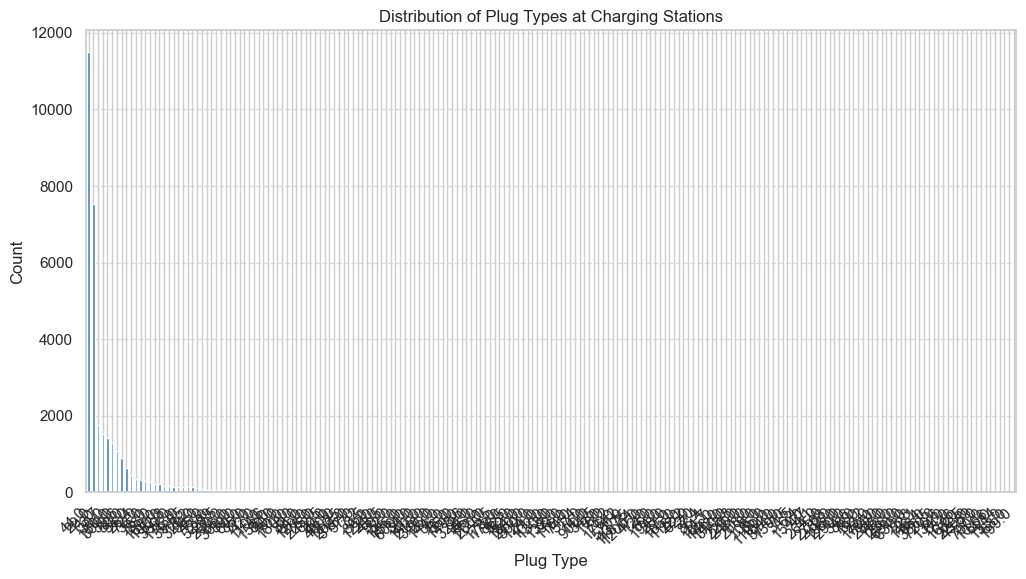

In [47]:
# Plot the distribution of plug types
plt.figure(figsize=(12, 6))
anschlussleistung_counts = df['power_connection_capacity'].value_counts()
anschlussleistung_counts.plot(kind="bar", color="steelblue")

plt.title("Distribution of Plug Types at Charging Stations")
plt.xlabel("Plug Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [48]:
# average of ladepunkte

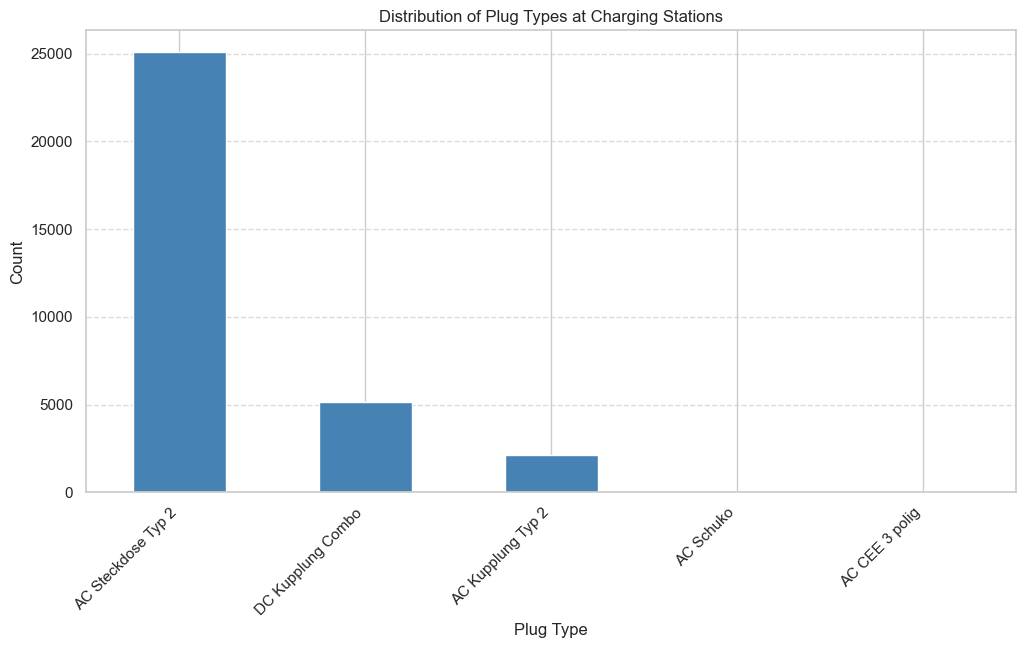

In [49]:
import matplotlib.pyplot as plt

# Combine all plug types into a single series for counting
all_plugs = pd.concat([df["plug_type_1"], df["plug_type_2"], df["plug_type_3"], df["plug_type_4"]])
plug_counts = all_plugs.value_counts()

# Plot the distribution of plug types
plt.figure(figsize=(12, 6))
plug_counts.plot(kind="bar", color="steelblue")

plt.title("Distribution of Plug Types at Charging Stations")
plt.xlabel("Plug Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [50]:
# drop coluns with YEAR <=2018, to combine with the other datasets

# Drop rows where the year is <= 2018
df_filtered = df[df["year"] > 2017]

# Save the filtered dataset
filtered_file_path = "./charging_data_6_years.csv"
df_filtered.to_csv(filtered_file_path, index=False)

filtered_file_path

'./charging_data_6_years.csv'

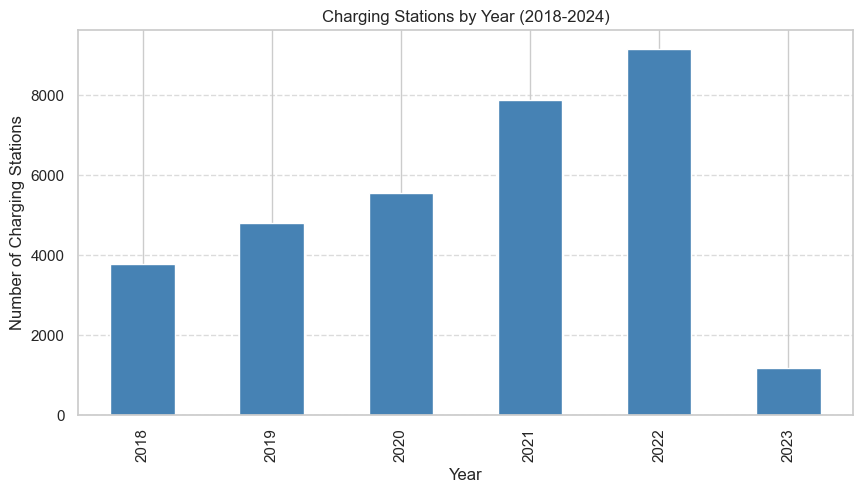

In [51]:
df = df_filtered

# Plot: Number of stations by year
plt.figure(figsize=(10, 5))
df["year"].value_counts().sort_index().plot(kind="bar", color="steelblue")
plt.title("Charging Stations by Year (2018-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Charging Stations")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [52]:
df_filtered['operator'].value_counts()

operator
E.ON Drive GmbH                       1981
EnBW mobility+ AG und Co.KG           1864
Mercedes-Benz AG                       825
EWE Go GmbH                            673
Westenergie Metering GmbH              588
                                      ... 
Auto-Zentrum Schwinn GmbH & Co. KG       1
Scherer GmbH & Co. KG, Homburg           1
Fitness-Treff Orscholz GmbH              1
Karl Bergisch GmbH & Co.KG               1
Autohaus Kämpflein GmbH & Co. KG         1
Name: count, Length: 4521, dtype: int64

In [53]:
betreiber_counts = df["operator"].value_counts()
# Filter Betreiber with more than 10 stations
betreiber_more_than_10 = betreiber_counts[betreiber_counts > 50]

# Display the count of such Betreiber
print(f"Number of Betreiber with more than 10 stations: {len(betreiber_more_than_10)}")

# Display the top entries
print(betreiber_more_than_10)

Number of Betreiber with more than 10 stations: 87
operator
E.ON Drive GmbH                1981
EnBW mobility+ AG und Co.KG    1864
Mercedes-Benz AG                825
EWE Go GmbH                     673
Westenergie Metering GmbH       588
                               ... 
STAWAG Stadtwerke Aachen AG      54
Mainzer Stadtwerke AG            53
Stadtwerke Husum GmbH            52
E-Werk Mittelbaden               51
Stadtwerke Göttingen eMobil      51
Name: count, Length: 87, dtype: int64


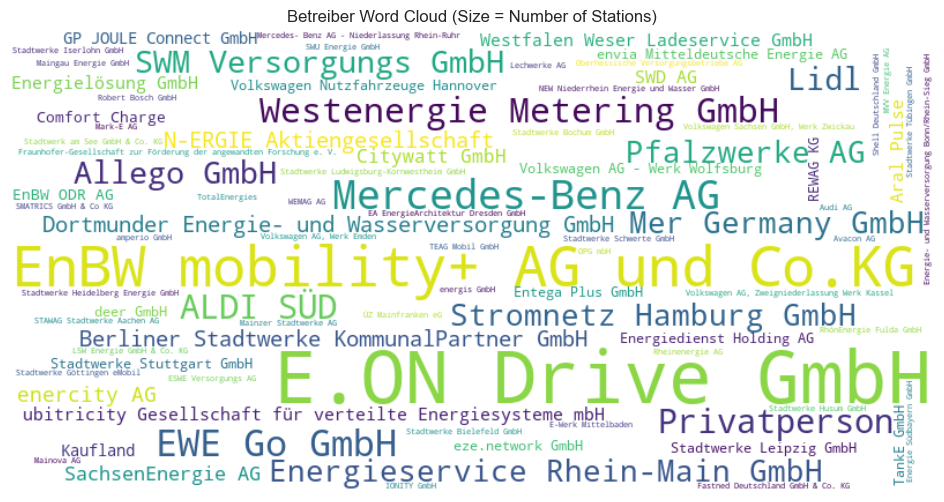

In [54]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(betreiber_more_than_10)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Betreiber Word Cloud (Size = Number of Stations)")
plt.show()

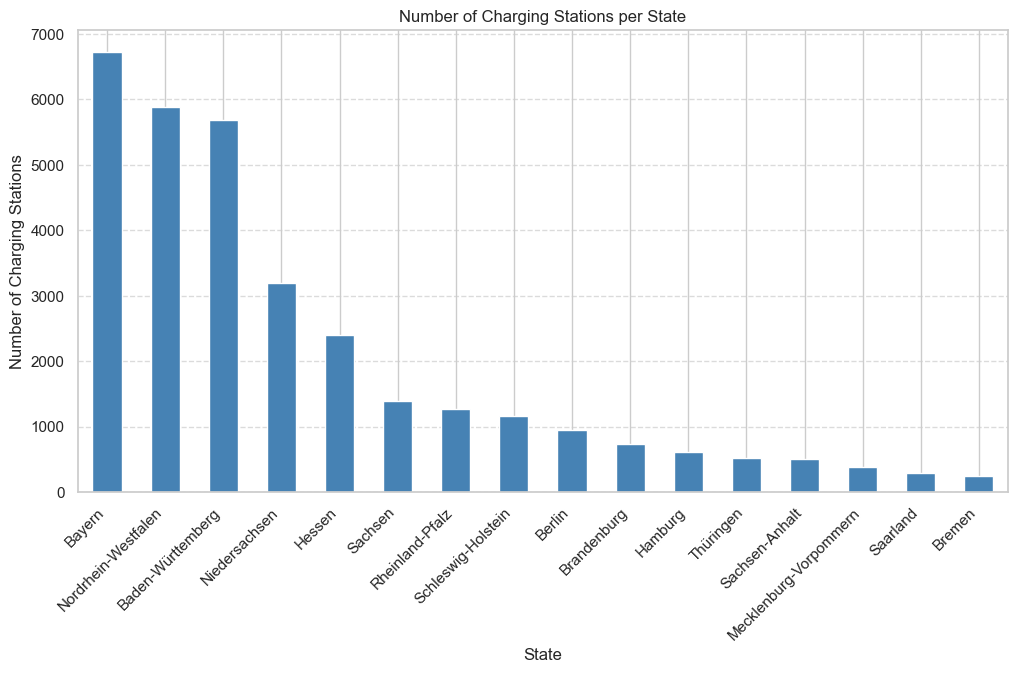

In [55]:
# Count the number of stations per state
stations_by_state = df["state"].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
stations_by_state.plot(kind="bar", color="steelblue")

plt.title("Number of Charging Stations per State")
plt.xlabel("State")
plt.ylabel("Number of Charging Stations")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [57]:
# Create a summary DataFrame with the count of stations per state
df_stations_state = df.groupby("state").size().reset_index(name="number_of_stations")

# Display the result
print(df_summary)


                     state  number_of_stations
0        Baden-Württemberg                5678
1                   Bayern                6722
2                   Berlin                 954
3              Brandenburg                 737
4                   Bremen                 247
5                  Hamburg                 616
6                   Hessen                2399
7   Mecklenburg-Vorpommern                 391
8            Niedersachsen                3203
9      Nordrhein-Westfalen                5878
10         Rheinland-Pfalz                1269
11                Saarland                 295
12                 Sachsen                1386
13          Sachsen-Anhalt                 511
14      Schleswig-Holstein                1164
15               Thüringen                 517


In [ ]:
df_stations_state.to_csv('stations_per_state.csv', index=False)

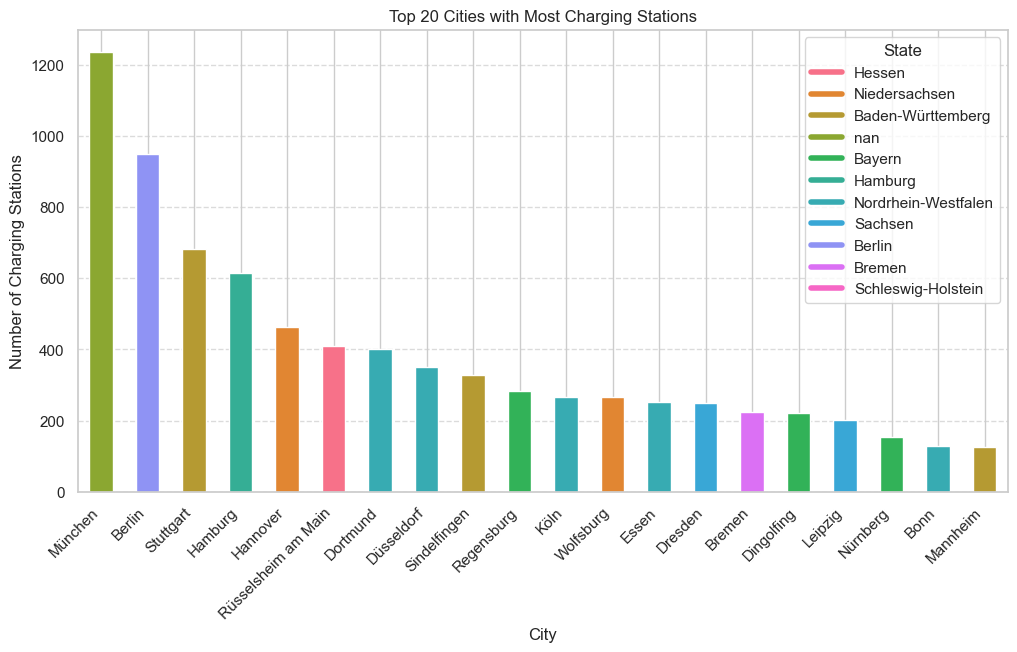

In [58]:
# Group by 'city' and count the number of stations
stations_by_city = df["city"].value_counts().sort_values(ascending=False)

# Select the top 20 cities
top_cities = stations_by_city[:20].index

# Filter original DataFrame to include only these cities
df_top_cities = df[df["city"].isin(top_cities)]

# Group again to get the exact counts per city
city_counts = df_top_cities.groupby("city").size().loc[top_cities]

# Assign a unique color per state
state_colors = dict(zip(df_top_cities["state"].unique(), sns.color_palette("husl", n_colors=df_top_cities["state"].nunique())))
city_colors = df_top_cities.drop_duplicates("city").set_index("city")["state"].map(state_colors)

# Plot the bar chart
plt.figure(figsize=(12, 6))
city_counts.plot(kind="bar", color=city_colors.loc[top_cities])

plt.title("Top 20 Cities with Most Charging Stations")
plt.xlabel("City")
plt.ylabel("Number of Charging Stations")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Create legend mapping states to colors
legend_patches = [plt.Line2D([0], [0], color=color, lw=4, label=state) for state, color in state_colors.items()]
plt.legend(handles=legend_patches, title="State")

plt.show()

## Collect now the third data set

In [60]:
population = pd.read_csv('population_states.csv')
population.head()

,Land,Total,Area,Density
0,Baden-Württemberg,11280 257,"35747,85",316
1,Bayern,13369 393,"70541,58",190
2,Berlin,3755 251,"891,12",4214
3,Brandenburg,2573 135,"29654,38",87
4,Bremen,684864,"419,61",1632


In [64]:
population.rename(columns = {"Land":"State"}, inplace=True)
df_stations_state.rename (columns = {"state":"State", "number_of_stations": "Number of stations"}, inplace=True)

population = population.merge(df_stations_state, on = "State", how="left")

population.head(5)


,State,Total,Area,Density,Number of stations
0,Baden-Württemberg,11280 257,"35747,85",316,5678
1,Bayern,13369 393,"70541,58",190,6722
2,Berlin,3755 251,"891,12",4214,954
3,Brandenburg,2573 135,"29654,38",87,737
4,Bremen,684864,"419,61",1632,247


In [65]:
# Convert types of "Area" and "Total" to int
population["Area"] = population["Area"].str.replace(",", "").astype(int)
population["Total"] = population ["Area"].astype(int)

population.head(5)

,State,Total,Area,Density,Number of stations
0,Baden-Württemberg,3574785,3574785,316,5678
1,Bayern,7054158,7054158,190,6722
2,Berlin,89112,89112,4214,954
3,Brandenburg,2965438,2965438,87,737
4,Bremen,41961,41961,1632,247
